In [965]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

In [966]:
data=pd.read_csv("D:/Assignments/XGBM & LGBM/XGBM & LGBM/Titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [967]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [968]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Now we need to combine bothe the data set (train,test)

In [970]:
train_df = pd.read_csv("D:/Assignments/XGBM & LGBM/XGBM & LGBM/Titanic_train.csv")
test_df = pd.read_csv("D:/Assignments/XGBM & LGBM/XGBM & LGBM/Titanic_test.csv")
combine = [train_df, test_df]

In [971]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [972]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [973]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [974]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [975]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [976]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [977]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Relationship between features and survival

In [979]:
survived = train_df[train_df['Survived'] == 1]
not_survived = train_df[train_df['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train_df)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train_df)*100.0))
print ("Total: %i"%len(train_df))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


In [980]:
train_df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

+ Lets check weather pclass and survivalhas some relationship

In [982]:
train_df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [983]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


+ As we can see that First class has higher survival rate

<Axes: xlabel='Pclass', ylabel='Survived'>

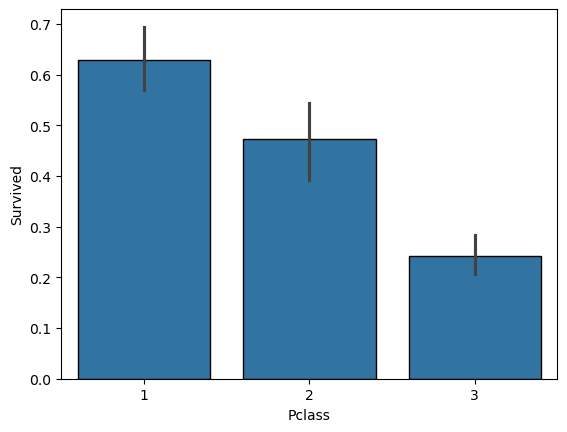

In [985]:
sns.barplot(x='Pclass', y='Survived', data=train_df,edgecolor ='k')

+ Now lets checck weather sex and Survival are related

In [987]:
train_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [988]:
train_df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [989]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<Axes: xlabel='Sex', ylabel='Survived'>

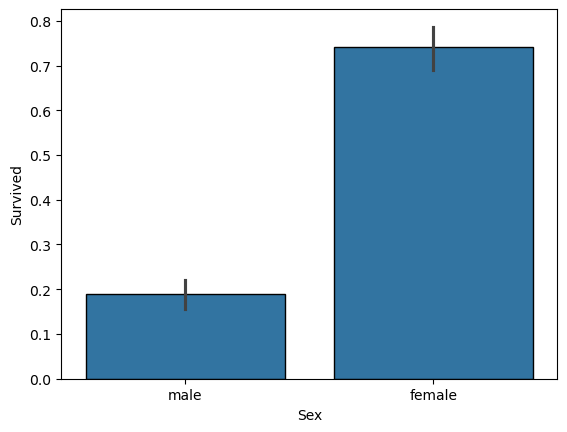

In [990]:
sns.barplot(x='Sex', y='Survived', data=train_df,edgecolor='k')

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

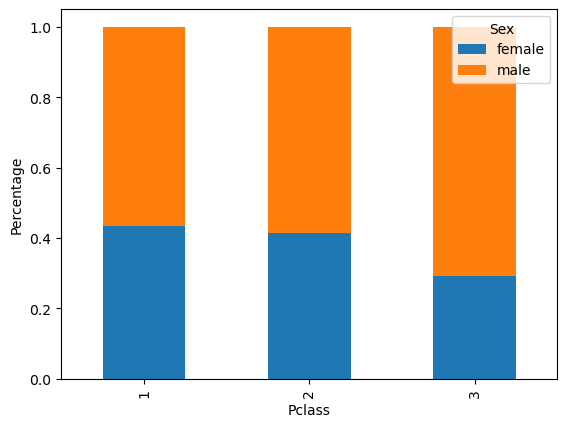

In [991]:
tab = pd.crosstab(train_df['Pclass'], train_df['Sex'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

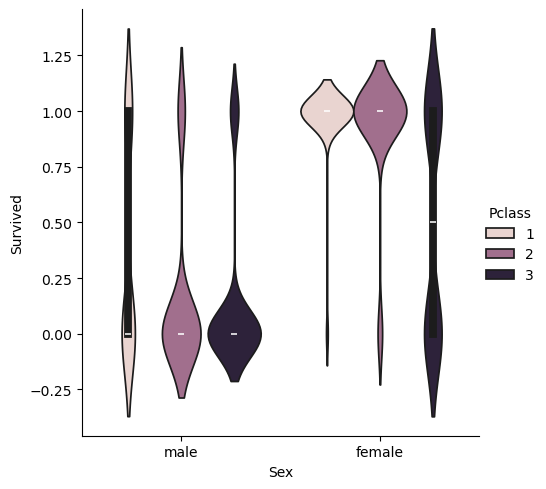

In [992]:
sns.catplot(x='Sex', y='Survived', hue='Pclass',data = train_df,kind='violin')

# From the above plot, it can be seen that:
+ Women from 1st and 2nd Pclass have almost 100% survival chance.
+ Men from 2nd and 3rd Pclass have only around 10% survival chance.

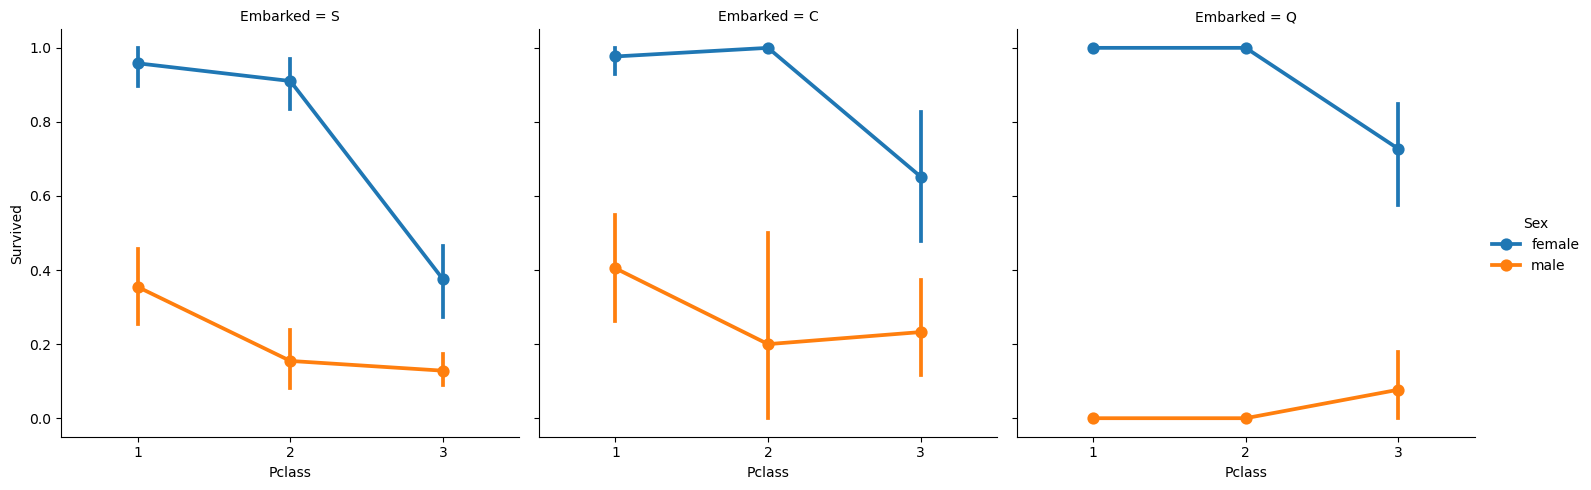

In [994]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train_df,kind='point')
            

# From the above plot, it can be seen that:

+ Almost all females from Pclass 1 and 2 survived.
+ Females dying were mostly from 3rd Pclass.
+ Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3.

# Embarked vs. Survived

In [997]:
train_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [998]:
train_df.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

In [999]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<Axes: xlabel='Embarked', ylabel='Survived'>

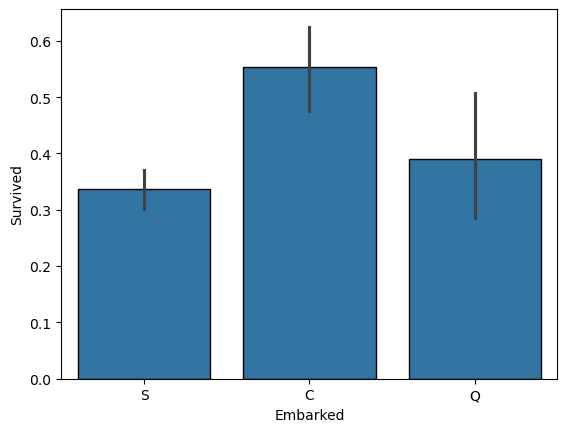

In [1000]:
sns.barplot(x='Embarked', y='Survived', data=train_df,edgecolor='k')

# Age / survival

<Figure size 1500x500 with 0 Axes>

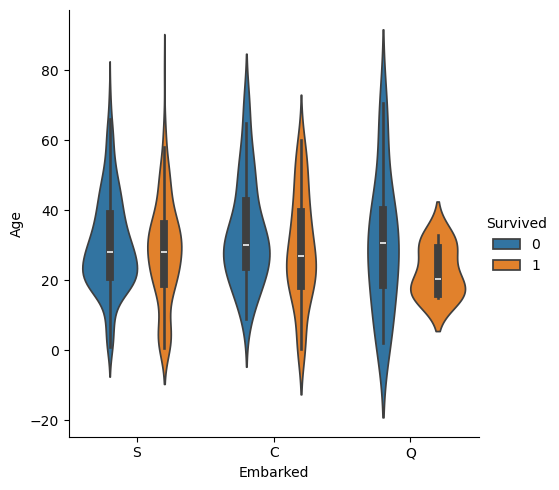

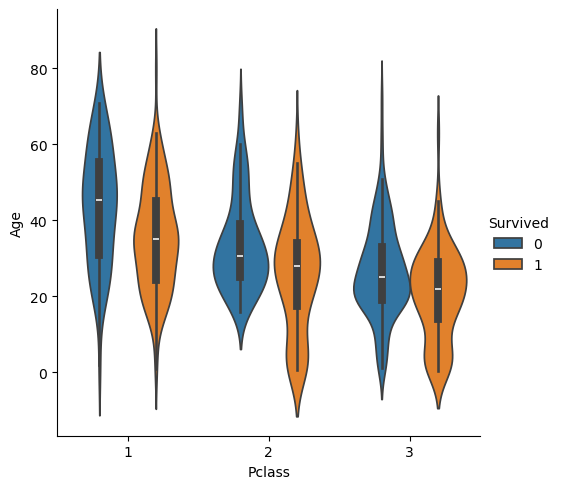

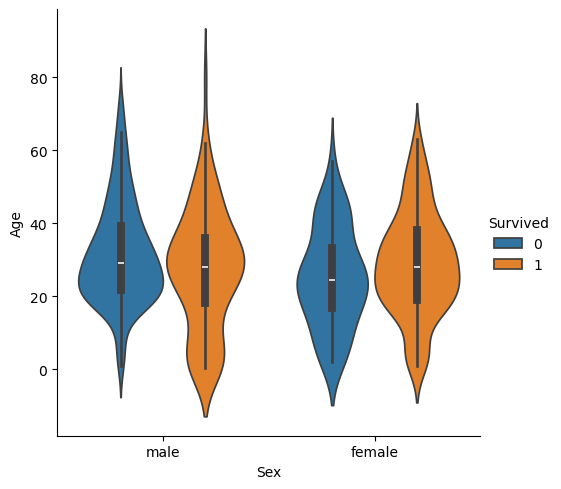

In [1002]:
fig = plt.figure(figsize=(15,5))
sns.catplot(x="Embarked", y="Age", hue="Survived", data=train_df,kind='violin')
sns.catplot(x="Pclass", y="Age", hue="Survived", data=train_df,kind='violin')
sns.catplot(x="Sex", y="Age", hue="Survived", data=train_df,kind='violin')

# From Pclass violinplot, we can see that:

+ 1st Pclass has very few children as compared to other two classes.
+ 1st Plcass has more old people as compared to other two classes.
+ Almost all children (between age 0 to 10) of 2nd Pclass survived.
+ Most children of 3rd Pclass survived.
+ Younger people of 1st Pclass survived as compared to its older people.

# From Sex violinplot, we can see that:

+ Most male children (between age 0 to 14) survived.
+ Females with age between 18 to 40 have better survival chance.

+ #  Feature Extraction
### Here we select the appropriate features to train our classifier.
+ we create new features based on existing features.
+ We also convert categorical features into numeric form.

In [1005]:
# combining train and test dataset
train_test_data = [train_df, test_df] 

for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [1006]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [1007]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [1008]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


# Encoding: Label Encoding

In [1010]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [1011]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


# Sex Feature
+ ### We convert the categorical value of Sex into numeric. We represent 0 as female and 1 as male.

In [1013]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [1014]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1


# Embark feature

In [1016]:
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1017]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# since S is of highest category we replace nan with S

In [1019]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [1020]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [1021]:
train_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

# We now convert the categorical value of Embarked into numeric. We represent 0 as S, 1 as C and 2 as Q.

In [1023]:
for dataset in train_test_data:

    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [1024]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0,5
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,1


# Age Feature
+ ## We first fill the NULL values of Age with a random number between (mean_age - std_age) and (mean_age + std_age).

+ ## We then create a new column named AgeBand. This categorizes age into 5 different age range.

In [1026]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)

print (train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.500000
1   (16.0, 32.0]  0.356522
2   (32.0, 48.0]  0.379747
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [1027]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,NaN,0,5,"(16.0, 32.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,B42,0,2,"(16.0, 32.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,35,1,2,W./C. 6607,23.4500,NaN,0,2,"(32.0, 48.0]"
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,C148,1,1,"(16.0, 32.0]"


# Let us convert ageband into numeric values using label encoding

In [1029]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [1030]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,1,0,0,211536,13.0000,NaN,0,5,"(16.0, 32.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",1,1,0,0,112053,30.0000,B42,0,2,"(16.0, 32.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,1,2,W./C. 6607,23.4500,NaN,0,2,"(32.0, 48.0]"
889,890,1,1,"Behr, Mr. Karl Howell",0,1,0,0,111369,30.0000,C148,1,1,"(16.0, 32.0]"


# Fare feature
+ ## Replace missing Fare values with the median of Fare.

In [1032]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())

# Lets divide the fair into 4 categories

In [1034]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
print (train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


# Those who have paid high amount have highest chances of survival

## Now lets encode fareband into different categories

In [1037]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [1038]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,1,0,0,211536,1,NaN,0,5,"(16.0, 32.0]","(7.91, 14.454]"
887,888,1,1,"Graham, Miss. Margaret Edith",1,1,0,0,112053,2,B42,0,2,"(16.0, 32.0]","(14.454, 31.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2,1,2,W./C. 6607,2,NaN,0,2,"(32.0, 48.0]","(14.454, 31.0]"
889,890,1,1,"Behr, Mr. Karl Howell",0,1,0,0,111369,2,C148,1,1,"(16.0, 32.0]","(14.454, 31.0]"


# SibSp & Parch Feature
+ ## Combining SibSp & Parch feature, we create a new feature named FamilySize.

In [1040]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


# About data shows that:

+ Having FamilySize upto 4 (from 2 to 4) has better survival chance.
+ FamilySize = 1, i.e. travelling alone has less survival chance.
+ Large FamilySize (size of 5 and above) also have less survival chance.

# Let's create a new feature named IsAlone. This feature is used to check how is the survival chance while travelling alone as compared to travelling with family.

In [1043]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


# As we can see that travelling alone has only 30% survival chance.

In [1045]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]",1,1


# Now there are some unneccessary features that has to be dropped

In [1047]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train_df = train_df.drop(features_drop, axis=1)
test_df = test_df.drop(features_drop, axis=1)
train_df = train_df.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [1048]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,5,1
887,1,1,1,1,2,0,2,1
888,0,3,1,2,2,0,2,0
889,1,1,0,1,2,1,1,1


In [1049]:
test_df

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,1,1,0,1,1
414,1306,1,1,2,3,1,5,1
415,1307,3,0,2,0,0,1,1
416,1308,3,0,2,1,0,1,1


# We need to train the classifier 
+ ## Initially split those into train and test

In [1051]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [1052]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

# 1. Decision tree model

In [1054]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

86.87


# 2. Random forest model

In [1056]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

86.87


# 3. KNN model

In [1058]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

84.62


# 4. Xgboost model

In [1060]:
model = xgb.XGBClassifier()
clf_xgb=model.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test)
acc_xgb = round(clf_xgb.score(X_train, y_train) * 100, 2)
print (acc_xgb)

86.64


+ ## Hyperparameter tuning for xgboost

## Hyperparameter tuning for XGBoost involves adjusting the parameters that control the model's learning process to improve its performance1
### Some key hyperparameters to tune include:

+ Learning Rate: Controls the step size at each iteration while moving toward a minimum of a loss function2
.

+ Tree Depth: Determines the maximum depth of each tree3
.

+ Minimum Child Weight: Sets the minimum sum of weights needed in a child4
.

+ Subsampling Ratios: Controls the fraction of samples and features to use for each tree5
.

+ Regularization Settings: Includes parameters like lambda and alpha to control overfitting6
.

In [1063]:
from sklearn.model_selection import GridSearchCV


# Define hyperparameters grid
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train final model with best parameters
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [1064]:
print(best_params)
print(best_score)

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
0.8159371492704826


# Now lets rebuild the model using these parameters

In [1066]:
params = {
    'max_depth': 3,
    'learning_rate': 0.05,
    'n_estimators': 300,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}



model = xgb.XGBClassifier(**params)
clf_xgb=model.fit(X_train, y_train)
y_pred_train_xgb=clf_xgb.predict(X_train)
y_pred_xgb = clf_xgb.predict(X_test)
acc_xgb = round(clf_xgb.score(X_train, y_train) * 100, 2)
print (acc_xgb)

84.85


In [1067]:
y_train.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Lets get teh Precision_score, Recall_score, F1_score

In [1069]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision=precision_score(y_train,y_pred_train_xgb)
precision

0.8581314878892734

In [1070]:
recall = recall_score(y_train, y_pred_train_xgb)
f1 = f1_score(y_train, y_pred_train_xgb)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.8581314878892734
Recall: 0.7251461988304093
F1-score: 0.786053882725832


# 5. Lgboost model

In [1072]:
model = lgb.LGBMClassifier()
clf_lgb=model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [1073]:
y_pred_test = clf_lgb.predict(X_test)
y_pred_train=clf_lgb.predict(X_train)
acc_lgb = round(clf_lgb.score(X_train, y_train) * 100, 2)
print (acc_lgb)

85.75


In [1074]:
print(clf_lgb.feature_importances_)

[365 164 565 590 404 278 195]


In [1075]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone'], dtype='object')

# Hyperparameter tuning for lgboost

In [1077]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter space
param_grid = {
    'num_leaves': [20, 30, 40, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 5, 10, 15],
    'min_child_samples': [20, 30, 40, 50]
}

# Define the objective function
def objective(params):
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred_train)
    return -accuracy  # Minimize negative accuracy

# # Split data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomizedSearchCV
rs = RandomizedSearchCV(estimator=lgb.LGBMClassifier(), 
                        param_distributions=param_grid, 
                        n_iter=50, 
                        scoring='accuracy', 
                        cv=3, 
                        random_state=42)

# Perform hyperparameter tuning
rs.fit(X_train, y_train)

# Get the best parameters
best_params = rs.best_params_
print("Best parameters:", best_params)

# # Evaluate the best model
# best_model = rs.best_estimator_
# y_pred_test = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred_test)
# print("Test accuracy:", test_accuracy)

[LightGBM] [Info] Number of positive: 228, number of negative: 366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

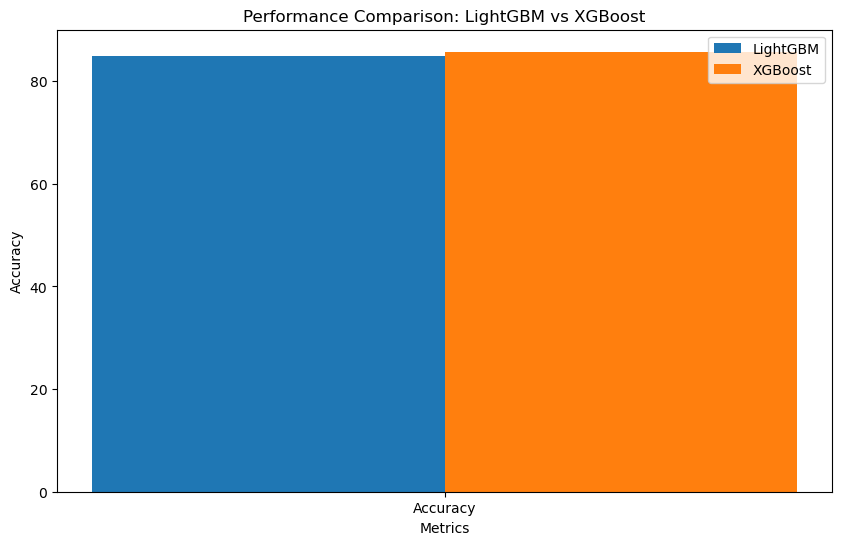

LightGBM Accuracy: 85.75
XGBoost Accuracy: 84.85


In [1078]:
labels = ['Accuracy']
lgb_scores = [acc_xgb]
xgb_scores = [acc_lgb]

x = range(len(labels))

plt.figure(figsize=(10, 6))

plt.bar(x, lgb_scores, width=0.4, label='LightGBM', align='center')
plt.bar([i + 0.4 for i in x], xgb_scores, width=0.4, label='XGBoost', align='center')

plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.xticks([i + 0.2 for i in x], labels)
plt.title('Performance Comparison: LightGBM vs XGBoost')
plt.legend()
plt.show()

# Interpretation
print("LightGBM Accuracy:", acc_lgb)
print("XGBoost Accuracy:", acc_xgb)

# lgb has accuracy of 85.75 after hyperparameter tuning
# xgb has accuracy of 84.85 

# Result : So we choose the best model as LGBM